In [1]:
import pandas as pd
import patsy
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
import seaborn as sns
from collections import defaultdict
import scipy
%matplotlib inline  

/Users/eric/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df =  pd.read_pickle('cleaned_df.p')

In [5]:
df.shape

(323, 53)

In [4]:
df.head()

,Price_Index,0.5 l (16 oz) domestic beer in the supermarket,1 beer in neighbourhood pub (500ml or 1pt.),"1 bottle of red table wine, good quality","1 box of 32 tampons (Tampax, OB, ...)",1 box of antibiotics (12 doses),1 cocktail drink in downtown club,1 kg (2 lb.) of apples,1 kg (2 lb.) of potatoes,1 kg (2 lb.) of tomatoes,...,Monthly rent for a 45 m2 (480 Sqft) furnished studio in NORMAL area,Monthly ticket public transport,Short visit to private Doctor (15 minutes),Standard men's haircut in expat area of the city,"Taxi trip on a business day, basic tariff, 8 km. (5 miles)",Tube of toothpaste,"Utilities 1 month (heating, electricity, gas ...) for 1 person in 45 m2 (480 Sqft) studio","Utilities 1 month (heating, electricity, gas ...) for 2 people in 85m2 flat","Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new","iPad Air 2, 64GB"
"Zurich, Switzerland",258,2.23,8.0,15.0,9.0,31.0,17.0,3.70,2.80,4.58,...,1668,104,145.0,47.0,38.0,4.17,92,154,28178,633.0
"Geneva, Switzerland",257,2.09,7.0,20.0,8.0,32.0,20.0,4.28,3.13,4.13,...,1778,73,115.0,47.0,37.0,4.04,114,198,26713,544.0
"Grand Cayman, Cayman Islands",255,4.11,6.0,28.0,10.0,25.0,13.0,8.00,4.26,5.84,...,1322,106,149.0,31.0,28.0,4.51,292,353,32956,759.0
"New York City, United States",245,2.93,7.0,17.0,7.0,27.0,15.0,3.71,1.90,4.90,...,2012,119,171.0,26.0,16.0,2.30,126,202,22312,386.0
"Reykjavik, Iceland",240,3.49,10.0,23.0,7.0,20.0,21.0,3.41,2.59,4.13,...,1303,107,42.0,48.0,31.0,3.78,71,116,32704,1004.0


### Rename row

In [3]:
as_list = df.index.tolist()
idx = as_list.index('Hong Kong')
as_list[idx] = 'Hong Kong, China'
df.index = as_list

### Drop features with null values

In [35]:
df1 = df.copy()

In [36]:
df1.columns[df1.isnull().any()] # features with null values

Index(['1 box of antibiotics (12 doses)',
       '1 min. of prepaid mobile tariff (no discounts or plans)',
       '40” flat screen TV', 'Short visit to private Doctor (15 minutes)',
       'Taxi trip on a business day, basic tariff, 8 km. (5 miles)',
       'iPad Air 2, 64GB'],
      dtype='object')

In [9]:
df1.dropna(axis=1, inplace = True)

In [10]:
df1.columns[df1.isnull().any()]

Index([], dtype='object')

In [11]:
df1.shape

(323, 47)

### Use statsmodels to create a model

In [12]:
y = df1.iloc[:,0].values.reshape(-1,1) # need to reshape into a column vector
X = df1.iloc[:, 1:]

X['Intercept'] = 1.0           # create column of ones
cols = X.columns.tolist()      
cols = cols[-1:] + cols[:-1]
X = X[cols]                    # move intercept column to column 0

In [13]:
X.shape

(323, 47)

In [14]:
# Create your model
model = sm.OLS(y, X)

In [15]:
# Fit your model to your training set
fit = model.fit()

In [16]:
# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     1907.
Date:                Mon, 09 Oct 2017   Prob (F-statistic):          1.83e-319
Time:                        06:03:13   Log-Likelihood:                -749.16
No. Observations:                 323   AIC:                             1592.
Df Residuals:                     276   BIC:                             1770.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================================================
                                                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                         3.3527      1.468      2.283      0.023       0.462       6.243
0.5 l (16 oz) domestic beer in the supermarket                                                                    1.0725      0.431      2.488      0.013       0.224       1.921
1 beer in neighbourhood pub (500ml or 1pt.)                                                                       0.4030      0.207      1.948      0.052      -0.004       0.810
1 bottle of red table wine, good quality                                                                          0.1295      0.069      1.879      0.061      -0.006       0.265
1 box of 32 tampons (Tampax, OB, ...)                                                                             0.1964      0.148      1.324      0.187      -0.096       0.488
1 cocktail drink in downtown club                                                                                -0.2384      0.100     -2.395      0.017      -0.434      -0.042
1 kg (2 lb.) of apples                                                                                            0.4954      0.351      1.412      0.159      -0.195       1.186
1 kg (2 lb.) of potatoes                                                                                          0.4834      0.537      0.901      0.369      -0.573       1.540
1 kg (2 lb.) of tomatoes                                                                                          0.2627      0.285      0.923      0.357      -0.298       0.823
1 liter (1 qt.) of whole fat milk                                                                                -0.0501      0.614     -0.082      0.935      -1.258       1.158
1 liter (1/4 gallon) of gas                                                                                       3.2717      0.799      4.095      0.000       1.699       4.845
1 month of gym membership in business district                                                                    0.0601      0.011      5.561      0.000       0.039       0.081
1 package of Marlboro cigarettes                                                                                  0.1392      0.095      1.461      0.145      -0.048       0.327
1 pair of jeans (Levis 501 or similar)                                                                           -0.0189      0.017     -1.130      0.259      -0.052       0.014
1 pair of men’s leather business shoes                   

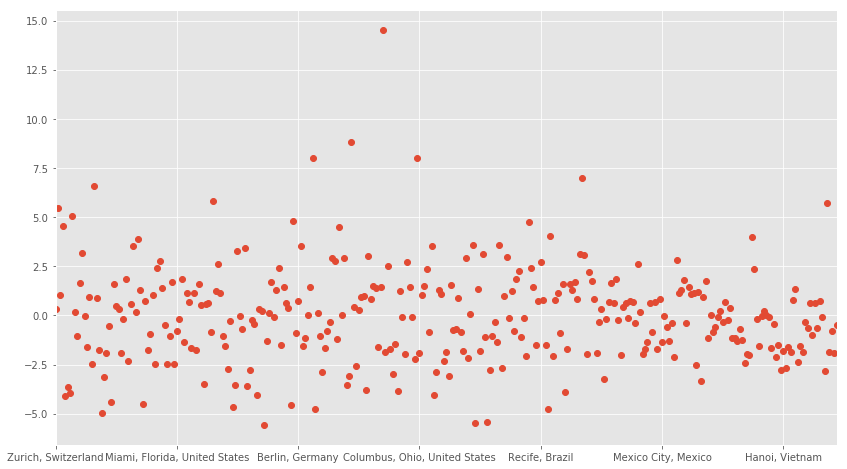

In [30]:
# plot the residuals
plt.style.use('ggplot')
fit.resid.plot(style='o', figsize=(14,8));

### Use sklearn to create a linear model

In [18]:
df2 = df1.copy()

In [20]:
# features
X = df2.iloc[:, 1:]
# target
y = df2.iloc[:, 0]

In [21]:
# Create an empty model
lr = LinearRegression()

In [22]:
# Fit the model to the full dataset
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
pred_y = lr.predict(X)

In [23]:
# Print out the R^2 for the model against the full dataset
lr.score(X,y)

0.99686345043517899

In [40]:
df2.corr()['Price_Index'].sort_values(ascending=False)[:10]

Price_Index                                                                                                      1.000000
Monthly rent for 85 m2 (900 Sqft) furnished accommodation in NORMAL area                                         0.915529
Monthly rent for a 45 m2 (480 Sqft) furnished studio in NORMAL area                                              0.907874
Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area                                      0.902509
Basic dinner out for two in neighborhood pub                                                                     0.900362
Monthly rent for a 45 m2 (480 Sqft) furnished studio in EXPENSIVE area                                           0.899606
Dinner for two at an Italian restaurant in the expat area including appetisers, main course, wine and dessert    0.885066
2 tickets to the movies                                                                                          0.872404
Standard men's haircut i

### Eliminate the features for which we will not easily be able to find the prices from city to city

In [323]:
features = ('Price_Index', 'log_pi', '1 liter (1/4 gallon) of gas', 'Combo meal in fast food restaurant (Big Mac Meal or similar)',
           'Internet 8 Mbps (1 month)',  'Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area', 'log_rent',
            'Monthly ticket public transport', 'Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new'
             )

In [324]:
len(features)

9

In [325]:
df3 = df2.copy()

In [326]:
#df.isin([1, 3, 12, 'a'])
mask= df3.columns.isin(features)
df3.columns[mask]

Index(['Price_Index', '1 liter (1/4 gallon) of gas',
       'Combo meal in fast food restaurant (Big Mac Meal or similar)',
       'Internet 8 Mbps (1 month)',
       'Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area',
       'Monthly ticket public transport',
       'Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new',
       'log_rent', 'log_pi'],
      dtype='object')

In [327]:
df3.columns.isin(features) # mask for columns to keep

array([ True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False,  True, False,
       False,  True, False, False, False,  True, False, False, False,
       False,  True,  True,  True], dtype=bool)

In [328]:
df3 = df3.loc[:, df3.columns.isin(features)]

,Price_Index,1 liter (1/4 gallon) of gas,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",log_rent,log_pi
City,,,,,,,,,
"Zurich, Switzerland",258,1.56,15.00,50.00,3192,104,28178,8.068403,5.552960
"Geneva, Switzerland",257,1.66,14.00,52.00,3761,73,26713,8.232440,5.549076
"Grand Cayman, Cayman Islands",255,1.17,11.00,99.00,3191,106,32956,8.068090,5.541264
"New York City, United States",245,0.72,8.00,49.00,3675,119,22312,8.209308,5.501258
"Reykjavik, Iceland",240,1.86,16.00,61.00,2503,107,32704,7.825245,5.480639
"San Francisco, California, United States",238,0.80,8.00,48.00,4302,79,22734,8.366835,5.472271
"Oslo, Norway",230,1.85,12.00,47.00,2572,87,43024,7.852439,5.438079
"Washington D.C., United States",230,0.64,7.00,51.00,2838,171,22419,7.950855,5.438079
"London, United Kingdom",227,1.60,8.00,29.00,3048,184,23867,8.022241,5.424950


In [339]:
df3 = df3.loc[:, df3.columns.isin(features)]

In [345]:
df3.head()

,Price_Index,1 liter (1/4 gallon) of gas,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",log_rent,log_pi
City,,,,,,,,,
"Zurich, Switzerland",258,1.56,15.0,50.0,3192,104,28178,8.068403,5.552960
"Geneva, Switzerland",257,1.66,14.0,52.0,3761,73,26713,8.232440,5.549076
"Grand Cayman, Cayman Islands",255,1.17,11.0,99.0,3191,106,32956,8.068090,5.541264
"New York City, United States",245,0.72,8.0,49.0,3675,119,22312,8.209308,5.501258
"Reykjavik, Iceland",240,1.86,16.0,61.0,2503,107,32704,7.825245,5.480639


In [353]:
df3.corr()

,Price_Index,1 liter (1/4 gallon) of gas,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",log_rent,log_pi
Price_Index,1.000000,0.144544,0.761434,0.568273,0.902509,0.822602,0.262115,0.895580,0.978488
1 liter (1/4 gallon) of gas,0.144544,1.000000,0.368359,-0.344567,0.076116,0.158888,0.284303,0.034364,0.127792
Combo meal in fast food restaurant (Big Mac Meal or similar),0.761434,0.368359,1.000000,0.392750,0.562023,0.577233,0.240264,0.605842,0.768233
Internet 8 Mbps (1 month),0.568273,-0.344567,0.392750,1.000000,0.489809,0.413755,-0.004781,0.548274,0.590505
Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,0.902509,0.076116,0.562023,0.489809,1.000000,0.659124,0.196535,0.937580,0.859129
Monthly ticket public transport,0.822602,0.158888,0.577233,0.413755,0.659124,1.000000,0.137028,0.674400,0.812633
"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",0.262115,0.284303,0.240264,-0.004781,0.196535,0.137028,1.000000,0.205314,0.265840
log_rent,0.895580,0.034364,0.605842,0.548274,0.937580,0.674400,0.205314,1.000000,0.910122
log_pi,0.978488,0.127792,0.768233,0.590505,0.859129,0.812633,0.265840,0.910122,1.000000


In [358]:
sns.pairplot(df3, size = 15);

### Create new model with fewer features

In [340]:
y = df3.iloc[:,0].values.reshape(-1,1) # need to reshape into a column vector
X = df3.iloc[:, 1:7]

X['Intercept'] = 1.0           # create column of ones
cols = X.columns.tolist()      
cols = cols[-1:] + cols[:-1]
X = X[cols]                    # move intercept column to column 0

In [341]:
X.shape

(323, 7)

In [346]:
y.shape

(323, 1)

In [347]:
# Create your model
model3 = sm.OLS(y, X)

In [350]:
# Fit your model to your training set
fit3 = model3.fit()

In [351]:
# Print summary statistics of the model's performance
fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     1420.
Date:                Wed, 04 Oct 2017   Prob (F-statistic):          3.38e-225
Time:                        09:03:04   Log-Likelihood:                -1142.3
No. Observations:                 323   AIC:                             2299.
Df Residuals:                     316   BIC:                             2325.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      12.0348      2.377      5.063      0.000       7.358      16.711
1 liter (1/4 gallon) of gas                                                    -3.4025      1.565     -2.174      0.030      -6.482      -0.323
Combo meal in fast food restaurant (Big Mac Meal or similar)                    5.7724      0.338     17.080      0.000       5.107       6.437
Internet 8 Mbps (1 month)                                                       0.2206      0.040      5.486      0.000       0.141       0.300
Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area     0.0295      0.001     32.508      0.000       0.028       0.031
Monthly ticket public transport                                                 0.4399      0.023     19.548      0.000       0.396       0.484
Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new             0.0004   7.42e-05      5.890      0.000       0.000       0.001
==============================================================================
Omnibus:                       12.153   Durbin-Watson:                   1.832
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               25.809
Skew:                           0.055   Prob(JB):                     2.49e-06
Kurtosis:                       4.380   Cond. No.                     1.31e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.31e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Add a dummy variable for region

Create a dummy column: "Region"

In [435]:
region_to_country ={ 'Africa':
    ('Algeria',
    'Angola',
    'Benin',
    'Botswana',
    'Burundi',
    'Cameroon',
    'Cape Verde', 
    'Chad',
    'Central African Republic',
    'Comoros',
    'Republic of the Congo',
    'Democratic Republic of the Congo',
    'Côte d\'Ivoire (Ivory Coast)',
    'Djibouti',
    'Egypt',
    'Equatorial Guinea',
    'Eritrea',
    'Ethiopia',
    'Gabon',
    'The Gambia',
    'Ghana',
    'Guinea',
    'Guinea-Bissau',
    'Kenya',
    'Lesotho',
    'Liberia',
    'Libya',
    'Madagascar',
    'Malawi',
    'Mali',
    'Mauritania',
    'Mauritius', 
    'Morocco', 
    'Mozambique',
    'Namibia',
    'Niger', 
    'Nigeria',
    'Rwanda',
    'São Tomé and Príncipe',
    'Senegal',
    'Seychelles',
    'Sierra Leone',
    'Somalia', 
    'South Africa',
    'South Sudan',
    'Sudan',
    'Swaziland',
    'Tanzania',
    'Togo',
    'Tunisia',
    'Uganda',
    'Western Sahara',
    'Zambia',
    'Zimbabwe',),
              
'Asia':
    ('Afghanistan',
    'Armenia',
    'Azerbaijan',
    'Bangladesh',
    'Bhutan',
    'Brunei',
    'Cambodia',
    'China',
    'Taiwan',
    'East Timor',
    'Georgia',
    'India',
    'Indonesia',
    'Palestine', 
    'Japan',
    'Kazakhstan',
    'Kyrgyzstan',
    'Laos',
    'Malaysia',
    'Maldives',
    'Mongolia',
    'Myanmar',
    'Nepal',
    'North Korea',
    'Pakistan',
    'Philippines',
    'Russia',
    'Singapore',
    'South Korea',
    'Sri Lanka',
    'Tajikistan',
    'Thailand',
    'Turkmenistan',
    'Uzbekistan',
    'Vietnam'),              

'Central America':
    ('Antigua and Barbuda',
    'The Bahamas',
    'Barbados',
    'Belize',
    'Cayman Islands',
    'Costa Rica',
    'Cuba',
    'Curacao',
    'Dominica',
    'Dominican Republic',
    'El Salvador',
    'Grenada',
    'Guatemala',
    'Haiti',
    'Honduras',
    'Jamaica',
    'Nicaragua',
    'Panama',
    'Puerto Rico',
    'Saint Kitts and Nevis',
    'Saint Lucia',
    'Saint Vincent and the Grenadines',
    'Trinidad and Tobago',
    'Turks and Caicos'),

'Eastern Europe':
    ('Albania',
    'Belarus',
    'Bosnia and Herzegovina',
    'Bulgaria',
    'Croatia',
    'Cyprus',
    'Czech Republic',
    'Estonia',
    'Hungary', 
    'Kosovo',
    'Latvia',
    'Lithuania',
    'Macedonia',
    'Moldova',
    'Montenegro',
    'Poland',
     'Romania',
    'Russia',
    'Serbia',
    'Slovakia',
    'Slovenia',
    'Ukraine',
    ),
                 
'Middle East':
    ('Bahrain',
     'Jordan',
     'Kuwait',
     'Iran',
     'Iraq',
     'Israel',
     'Lebanon',
     'Oman',
     'Qatar',
     'Turkey',
     'Saudi Arabia',
     'Syria',
     'United Arab Emirates',
     'Yemen'),

'North America':
    ('Canada',
    'Greenland',
    'United States',
    'Mexico'),
              
'South America':
    ('Argentina', 
    'Bolivia',
    'Brazil', 
    'Chile', 
    'Colombia',
    'Ecuador',
    'French Guiana',
    'Guyana',
    'Paraguay',
    'Peru',
    'Suriname',
    'Uruguay',
    'Venezuela'),

'Western Europe':
    ('Andorra',
     'Austria',
     'Belgium',
     'Denmark',
     'Finland',
     'France',
     'Germany',
     'Greece',
     'Iceland',
     'Ireland',
     'Italy',
     'Liechtenstein',
     'Luxembourg',
     'Malta',
     'Monaco',
     'Netherlands',
     'Norway',
     'Portugal',
     'San Marino',
     'Spain',
     'Sweden',
     'Switzerland',
     'Turkey',
     'United Kingdom',
     'Vatican City'),


'Oceania':
    ('Australia',
    'New Zealand',
    'Fiji',
    'Papua New Guinea',
    'Solomon Islands',
    'Vanuatu',
    'Kiribati',
    'Marshall Islands', 
    'Micronesia',
    'Nauru',
    'Palau',
    'Samoa',
    'Tonga',
    'Tuvalu')
    }

Country to region dictionary

In [436]:
country_to_region = {}
for region, tup in region_to_country.items():
    for country in tup:
        country_to_region[country]=region

In [437]:
len(tuple(country_to_region.items()))

203

In [444]:
region_lst = []
for city in df3.index.values:
    country = city.split(', ')[-1]
    continent = country_to_region[country]
    region_lst.append(continent)

In [454]:
df3.head()

,Price_Index,1 liter (1/4 gallon) of gas,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",log_rent,log_pi,Region
"Zurich, Switzerland",258,1.56,15.0,50.0,3192,104,28178,8.068403,5.552960,Western Europe
"Geneva, Switzerland",257,1.66,14.0,52.0,3761,73,26713,8.232440,5.549076,Western Europe
"Grand Cayman, Cayman Islands",255,1.17,11.0,99.0,3191,106,32956,8.068090,5.541264,Central America
"New York City, United States",245,0.72,8.0,49.0,3675,119,22312,8.209308,5.501258,North America
"Reykjavik, Iceland",240,1.86,16.0,61.0,2503,107,32704,7.825245,5.480639,Western Europe


In [482]:
dummy_df = pd.get_dummies(df3['Region'])

In [486]:
df3 = df3.join(dummy_df.iloc[:,1:])
df3.head()

,Price_Index,1 liter (1/4 gallon) of gas,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",log_rent,log_pi,Region,Asia,Central America,Eastern Europe,Middle East,North America,Oceania,South America,Western Europe
"Zurich, Switzerland",258,1.56,15.0,50.0,3192,104,28178,8.068403,5.552960,Western Europe,0,0,0,0,0,0,0,1
"Geneva, Switzerland",257,1.66,14.0,52.0,3761,73,26713,8.232440,5.549076,Western Europe,0,0,0,0,0,0,0,1
"Grand Cayman, Cayman Islands",255,1.17,11.0,99.0,3191,106,32956,8.068090,5.541264,Central America,0,1,0,0,0,0,0,0
"New York City, United States",245,0.72,8.0,49.0,3675,119,22312,8.209308,5.501258,North America,0,0,0,0,1,0,0,0
"Reykjavik, Iceland",240,1.86,16.0,61.0,2503,107,32704,7.825245,5.480639,Western Europe,0,0,0,0,0,0,0,1


### Create model with dummy features

In [527]:
df4 = df3.copy()

In [542]:
y = df4.iloc[:,0].values.reshape(-1,1) # need to reshape into a column vector
X = df4.iloc[:, [1,2,3,4,5,6,11,12,13,14,15,16,17]]

X = X.assign(Intercept = 1.0) # create column of ones

In [501]:
len(df4.columns)

18

### create feature matrix

In [544]:
X.shape

(323, 14)

In [545]:
y.shape

(323, 1)

In [546]:
model4 = sm.OLS(y, X)
fit4 = model4.fit()

In [548]:
# Print summary statistics of the model's performance
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     792.9
Date:                Wed, 04 Oct 2017   Prob (F-statistic):          1.73e-228
Time:                        16:32:54   Log-Likelihood:                -1108.9
No. Observations:                 323   AIC:                             2246.
Df Residuals:                     309   BIC:                             2299.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
1 liter (1/4 gallon) of gas                                                     1.5434      2.166      0.713      0.477      -2.718       5.805
Combo meal in fast food restaurant (Big Mac Meal or similar)                    5.4667      0.368     14.862      0.000       4.743       6.190
Internet 8 Mbps (1 month)                                                       0.1999      0.039      5.062      0.000       0.122       0.278
Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area     0.0285      0.001     32.270      0.000       0.027       0.030
Monthly ticket public transport                                                 0.4004      0.022     18.100      0.000       0.357       0.444
Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new             0.0006   7.01e-05      8.302      0.000       0.000       0.001
Central America                                                                 6.4127      2.697      2.378      0.018       1.105      11.720
Eastern Europe                                                                  5.3646      1.828      2.934      0.004       1.767       8.962
Middle East                                                                     3.3298      2.800      1.189      0.235      -2.180       8.839
North America                                                                  11.8911      1.863      6.382      0.000       8.225      15.557
Oceania                                                                        11.4595      2.997      3.824      0.000       5.563      17.356
South America                                                                   0.1489      1.957      0.076      0.939      -3.701       3.999
Western Europe                                                                  3.9962      2.121      1.885      0.060      -0.176       8.169
Intercept                                                                       3.9175      2.775      1.412      0.159      -1.542       9.377
==============================================================================
Omnibus:                       20.247   Durbin-Watson:                   1.931
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.219
Skew:                           0.119   Prob(JB):                     8.39e-14
Kurtosis:                       5.102   Cond. No.                     2.43e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.43e+05. This might in

Take out gasoline.

In [566]:
y = df4.iloc[:,0].values.reshape(-1,1) # need to reshape into a column vector
X = df4.drop(['Price_Index', '1 liter (1/4 gallon) of gas', 'log_rent', 'log_pi', 'Region'], axis = 1)
X = X.assign(Intercept = 1.0)          # create column of ones
cols = X.columns.tolist()      
cols = cols[-1:] + cols[:-1]
X = X[cols]                    # move intercept column to column 0

In [567]:
X.head()

,Intercept,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",Asia,Central America,Eastern Europe,Middle East,North America,Oceania,South America,Western Europe
"Zurich, Switzerland",1.0,15.0,50.0,3192,104,28178,0,0,0,0,0,0,0,1
"Geneva, Switzerland",1.0,14.0,52.0,3761,73,26713,0,0,0,0,0,0,0,1
"Grand Cayman, Cayman Islands",1.0,11.0,99.0,3191,106,32956,0,1,0,0,0,0,0,0
"New York City, United States",1.0,8.0,49.0,3675,119,22312,0,0,0,0,1,0,0,0
"Reykjavik, Iceland",1.0,16.0,61.0,2503,107,32704,0,0,0,0,0,0,0,1


In [568]:
X.shape

(323, 14)

In [569]:
y.shape

(323, 1)

In [570]:
# Create your model
model5 = sm.OLS(y, X)

In [571]:
# Fit your model to your training set
fit5 = model5.fit()

In [572]:
# Print summary statistics of the model's performance
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     875.8
Date:                Wed, 04 Oct 2017   Prob (F-statistic):          5.77e-235
Time:                        16:39:36   Log-Likelihood:                -1093.3
No. Observations:                 323   AIC:                             2215.
Df Residuals:                     309   BIC:                             2268.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================================
                                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      -6.0350      2.940     -2.053      0.041     -11.820      -0.249
Combo meal in fast food restaurant (Big Mac Meal or similar)                    5.5485      0.328     16.913      0.000       4.903       6.194
Internet 8 Mbps (1 month)                                                       0.2864      0.040      7.150      0.000       0.208       0.365
Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area     0.0281      0.001     33.299      0.000       0.026       0.030
Monthly ticket public transport                                                 0.4059      0.021     19.508      0.000       0.365       0.447
Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new             0.0006    6.7e-05      8.296      0.000       0.000       0.001
Asia                                                                           13.8056      2.444      5.649      0.000       8.997      18.615
Central America                                                                13.8235      2.889      4.785      0.000       8.139      19.508
Eastern Europe                                                                 16.2848      2.528      6.442      0.000      11.311      21.259
Middle East                                                                    10.8333      2.929      3.699      0.000       5.070      16.597
North America                                                                  19.1737      2.121      9.039      0.000      15.000      23.348
Oceania                                                                        19.5917      3.199      6.125      0.000      13.298      25.886
South America                                                                   9.3961      2.488      3.777      0.000       4.502      14.291
Western Europe                                                                 13.9378      2.513      5.545      0.000       8.992      18.884
==============================================================================
Omnibus:                       25.529   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.466
Skew:                           0.325   Prob(JB):                     2.24e-15
Kurtosis:                       5.142   Cond. No.                     3.75e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+05. This might in

In [573]:
df4.head()

,Price_Index,1 liter (1/4 gallon) of gas,Combo meal in fast food restaurant (Big Mac Meal or similar),Internet 8 Mbps (1 month),Monthly rent for 85 m2 (900 Sqft) furnished accommodation in EXPENSIVE area,Monthly ticket public transport,"Volkswagen Golf 1.4 TSI 150 CV (or equivalent), with no extras, new",log_rent,log_pi,Region,Asia,Central America,Eastern Europe,Middle East,North America,Oceania,South America,Western Europe
"Zurich, Switzerland",258,1.56,15.0,50.0,3192,104,28178,8.068403,5.552960,Western Europe,0,0,0,0,0,0,0,1
"Geneva, Switzerland",257,1.66,14.0,52.0,3761,73,26713,8.232440,5.549076,Western Europe,0,0,0,0,0,0,0,1
"Grand Cayman, Cayman Islands",255,1.17,11.0,99.0,3191,106,32956,8.068090,5.541264,Central America,0,1,0,0,0,0,0,0
"New York City, United States",245,0.72,8.0,49.0,3675,119,22312,8.209308,5.501258,North America,0,0,0,0,1,0,0,0
"Reykjavik, Iceland",240,1.86,16.0,61.0,2503,107,32704,7.825245,5.480639,Western Europe,0,0,0,0,0,0,0,1


In [574]:
df4.to_pickle('df4.p')